In [2]:
from src.transformer_main import *

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
config = load_data("/home/jl5307/current_research/AMD_prediction/results/transformer/5_fold/td5/fold3/transformer_config.pkl")

In [5]:
config

{'testing': False,
 'specify_fold': 3,
 'patience': 10,
 'lr_scheduling': [2000, 0.9],
 'class_weight': [0.03, 0.97],
 'l2_reg': 0.0001,
 'learning_rate': 0.0002,
 'dropout_rate': 0.1,
 'maximum_seq_length': 14,
 'intermediate_dim': 1024,
 'feature_dim': 2048,
 'num_heads': 8,
 'model_dim': 256,
 'num_layers': 2,
 'batch_size': 32,
 'epoch': 30,
 'feature_dict_path': '/home/jl5307/current_research/AMD_prediction/results/resnet101_amd_detection/fold3/extracted_feature_dict.pkl',
 'data_dict_path': '/home/jl5307/current_research/AMD_prediction/img_data/5_fold/five_fold_unrolled_longitudinal_prediction_td5_min5_data_dict.pkl',
 'output_path': '/home/jl5307/current_research/AMD_prediction/results/transformer/5_fold/td5/fold3/'}

In [7]:
print("load data...")
data_dict = load_data("/home/jl5307/current_research/AMD_prediction/img_data/5_fold/five_fold_unrolled_longitudinal_prediction_td5_min5_data_dict.pkl")
feature_dict = load_data("/home/jl5307/current_research/AMD_prediction/results/resnet101_amd_detection/fold3/extracted_feature_dict.pkl")

data_dict = data_dict[3]
training_set_dict = data_dict["train_set"]
validation_set_dict = data_dict["validation_set"]
test_set_dict = data_dict["test_set"]
per_length_test_set_dict = data_dict["per_length_test_set"]

load data...


In [11]:
        train_eye_list = training_set_dict["eye_list"]
        train_label_list = training_set_dict["label_list"]
        train_eye_list, train_label_list = build_stratified_batch(train_eye_list, train_label_list, 32)

/home/jl5307/current_research/AMD_prediction/utils/transformer_utils.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mydata1_array = np.array(mydata1)
/home/jl5307/current_research/AMD_prediction/utils/transformer_utils.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mydata2_array = np.array(mydata2)


In [14]:
train_label_list[:256]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0],
 [0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0],
 [0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0],
 [0, 0, 0, 0],
 [0, 0],
 [0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0,

In [5]:
train_eye_list = training_set_dict["eye_list"]
train_label_list = training_set_dict["label_list"]

In [8]:
current_seed = 1
np.random.seed(current_seed)
bootstrap_ind = np.random.randint(len(training_set_dict["eye_list"]), size=len(training_set_dict["eye_list"]))
train_eye_list = list(np.array(training_set_dict["eye_list"])[bootstrap_ind])
train_label_list = list(np.array(training_set_dict["label_list"])[bootstrap_ind])

/home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
/home/jl5307/current_research/virtualenvs/python3-workspace/lib/python3.6/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [6]:
i = 0
batch_size = 32

In [7]:
config

{'testing': False,
 'lr_scheduling': [2000, 0.9],
 'class_weight': [0.03, 0.97],
 'l2_reg': 0.0001,
 'learning_rate': 0.0005,
 'dropout_rate': 0.1,
 'maximum_seq_length': 14,
 'intermediate_dim': 1024,
 'feature_dim': 2048,
 'num_heads': 4,
 'model_dim': 256,
 'num_layers': 2,
 'batch_size': 32,
 'epoch': 30,
 'feature_dict_path': '/home/jl5307/current_research/AMD_prediction/results/resnet101_binary/b16_lr0005_e20_detection_imagenet/extracted_feature_dict.pkl',
 'data_dict_path': '/home/jl5307/current_research/AMD_prediction/img_data/data_dictionary/longitudinal_sequential_prediction_timedelta2_data_dict_min5_unrolled.pkl',
 'output_path': '/home/jl5307/current_research/AMD_prediction/results/transformer/testing2/'}

In [8]:
eye_list_batch = train_eye_list[i*batch_size:(i+1)*batch_size]
label_list_batch = train_label_list[i*batch_size:(i+1)*batch_size]
x_batch, y_batch, mask = prepare_batch(eye_list_batch, label_list_batch, feature_dict, config)

In [10]:
tfencoder = TransformerEncoder(config)

In [15]:
pos_x = tfencoder.pos_encoding[:, :x_batch.shape[1], :]

In [17]:
pos_x = tf.tile(pos_x, (32, 1, 1))

In [19]:
x = tf.concat([x_batch, pos_x], axis=-1)

In [20]:
x

<tf.Tensor: shape=(32, 11, 2304), dtype=float32, numpy=
array([[[0.00000000e+00, 2.64654875e-01, 8.35423172e-02, ...,
         1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.92108557e-01, 3.18828523e-02, ...,
         1.00000000e+00, 1.07460786e-04, 1.00000000e+00],
        [0.00000000e+00, 5.30269742e-01, 3.34764272e-01, ...,
         1.00000000e+00, 2.14921558e-04, 1.00000000e+00],
        ...,
        [0.00000000e+00, 6.88581824e-01, 4.29760695e-01, ...,
         9.99999583e-01, 8.59686173e-04, 9.99999642e-01],
        [0.00000000e+00, 2.77087361e-01, 1.22124694e-01, ...,
         9.99999464e-01, 9.67146887e-04, 9.99999523e-01],
        [0.00000000e+00, 1.83936775e-01, 2.72285305e-02, ...,
         9.99999344e-01, 1.07460760e-03, 9.99999404e-01]],

       [[1.57555602e-02, 3.77518743e-01, 1.85422972e-01, ...,
         1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [1.48494635e-03, 1.61478609e-01, 9.15140212e-02, ...,
         1.00000000e+00, 1.

In [13]:
optimizer = tf.keras.optimizers.Adam(0.0005)

In [14]:
WBCE = WeightedBinaryCrossEntropy(config["class_weight"])

In [15]:
with tf.GradientTape() as tape:
    y_hat = tfencoder(x_batch, training=True, mask=mask) # (batch_size, max_seq_len, 1)
    y_batch_flatten, y_hat_flatten = flatten_with_token(y_batch, y_hat, mask)
    batch_loss = WBCE(y_true=y_batch_flatten, y_pred=y_hat_flatten)

In [18]:
y_hat_flatten

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.36010227, 0.6317693 , 0.1007128 , 0.51811755, 0.2970631 ,
       0.60055393, 0.44760385, 0.42848042, 0.6613538 , 0.7078788 ,
       0.79358155, 0.3942905 , 0.5894834 , 0.54071623, 0.64659977,
       0.2920775 , 0.7003652 , 0.39244106, 0.21556196, 0.3288456 ,
       0.5540012 , 0.46032164, 0.6061068 , 0.7067645 , 0.21238543,
       0.79188806, 0.32500514, 0.30170637, 0.16025141, 0.5056533 ,
       0.78258276, 0.60505295], dtype=float32)>

In [18]:
gradients = tape.gradient(batch_loss, tfencoder.trainable_variables)

In [24]:
gradients[-2:]

In [23]:
config["use_pred_token"] + config["use_sep_token"]

2

In [22]:
tf.convert_to_tensor(gradients[-1])

<tf.Tensor: shape=(1, 256), dtype=float32, numpy=
array([[-1.0939905e-02,  6.1076432e-03, -2.6682648e-04,  6.3283360e-03,
        -1.1099438e-03, -1.8626484e-03,  6.8308599e-03,  1.0317721e-03,
        -4.8052110e-03,  2.3067803e-03, -2.8638924e-03,  7.0657078e-03,
         6.2206630e-03, -9.1263810e-03,  6.3771615e-05,  1.4720459e-03,
        -5.6562498e-03,  2.3109191e-03, -1.4889354e-03,  3.1555037e-03,
         6.2609054e-03,  3.3946196e-03, -4.7367997e-05, -3.3265864e-03,
         2.4779513e-04,  5.2309893e-03,  4.0175579e-03,  6.2495237e-03,
         9.7985612e-05,  5.7771597e-03, -3.9599165e-03,  1.3515016e-03,
         6.2165856e-03, -6.1514042e-03, -8.4598055e-03, -4.8168604e-03,
         7.2936462e-03,  8.5851410e-03, -2.0458172e-04, -7.4672261e-03,
         1.4508923e-03, -5.3941752e-03, -3.2290509e-03, -6.0789799e-03,
        -2.4528198e-03, -3.0670231e-03,  5.0416058e-03, -4.3033836e-03,
        -8.7196138e-03,  1.0016554e-03,  3.3354273e-03,  3.5355119e-03,
        -4.720

In [17]:
gradients[28] = tf.convert_to_tensor(gradients[28])

In [20]:
optimizer.apply_gradients(zip(gradients, tfencoder.trainable_variables))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [21]:
tfencoder.trainable_variables[28]

<tf.Variable 'transformer_encoder_segment/embedding/embeddings:0' shape=(14, 256) dtype=float32, numpy=
array([[0.5630772 , 0.11505289, 0.798545  , ..., 0.4574366 , 0.58071774,
        0.7034823 ],
       [0.04819032, 0.5135974 , 0.12054727, ..., 0.4686691 , 0.78699696,
        0.822659  ],
       [0.40732   , 0.2876018 , 0.08909594, ..., 0.9372763 , 0.02910435,
        0.3229447 ],
       ...,
       [0.37427723, 0.85207045, 0.8996314 , ..., 0.6357521 , 0.48250353,
        0.30101216],
       [0.77764904, 0.10581529, 0.55027926, ..., 0.676342  , 0.01359057,
        0.94359326],
       [0.7113341 , 0.6446711 , 0.5382227 , ..., 0.5635041 , 0.27108872,
        0.41298926]], dtype=float32)>

In [22]:
tfencoder.segment_embedding.weights

[<tf.Variable 'transformer_encoder_segment/embedding/embeddings:0' shape=(14, 256) dtype=float32, numpy=
 array([[0.5630772 , 0.11505289, 0.798545  , ..., 0.4574366 , 0.58071774,
         0.7034823 ],
        [0.04819032, 0.5135974 , 0.12054727, ..., 0.4686691 , 0.78699696,
         0.822659  ],
        [0.40732   , 0.2876018 , 0.08909594, ..., 0.9372763 , 0.02910435,
         0.3229447 ],
        ...,
        [0.37427723, 0.85207045, 0.8996314 , ..., 0.6357521 , 0.48250353,
         0.30101216],
        [0.77764904, 0.10581529, 0.55027926, ..., 0.676342  , 0.01359057,
         0.94359326],
        [0.7113341 , 0.6446711 , 0.5382227 , ..., 0.5635041 , 0.27108872,
         0.41298926]], dtype=float32)>]

In [53]:
y_hat = tfencoder(x_batch, training=False, mask=mask)

In [55]:
flatten_with_token(y_batch, y_hat, mask)

(<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([0.47569853, 0.5685923 , 0.5600135 , 0.5545443 , 0.4658615 ,
        0.52056885, 0.67804146, 0.5711364 , 0.54007596, 0.51302356,
        0.568271  , 0.49298552, 0.48620185, 0.4999061 , 0.56011105,
        0.6031454 , 0.508408  , 0.47407815, 0.50752336, 0.50783384,
        0.49484655, 0.47311184, 0.50953525, 0.54769397, 0.58552986,
        0.56796336, 0.5319487 , 0.5355243 , 0.5109187 , 0.44220167,
        0.4887052 , 0.5210665 ], dtype=float32)>)

In [ ]:
flatten_with_token()

In [48]:
y_batch

<tf.Tensor: shape=(32, 11), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
    def call(self, x, training, mask):
        """
        x: (batch_size, max_seq_len, feature_dim)
        """
        # image feature dim to model dim
        x = self.dense(x) # (batch_size, max_seq_len, model_dim)
        this_max_len = tf.shape(x)[1]

        if self.use_sep_token:
            sep_tensor = tf.tile(self.sep_token, (x.shape[0],x.shape[1],1))
            x = tf.reshape(tf.concat([x, sep_tensor], axis=-1), shape=(x.shape[0], this_max_len*2, x.shape[2]))
            mask = tf.tile(tf.reshape(mask, shape=(mask.shape[0], mask.shape[-1], 1)), (1,1,2))
            mask = tf.reshape(mask, shape=(mask.shape[0], 1, 1, mask.shape[1]*2))

        if self.use_pred_token:
            pred_tensor = tf.tile(self.pred_token, (x.shape[0],1,1))
            x = tf.concat([pred_tensor, x], axis=1)
            mask = tf.concat([tf.zeros(shape=(mask.shape[0],1,1,1)), mask], axis=-1)

        # add positional encoding

        x *= tf.math.sqrt(tf.cast(self.model_dim, tf.float32)) # scaling embedding
        x += self.pos_encoding[:, :x.shape[1], :]
        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask) # (batch_size, input_seq_len, d_model)

        return self.prediction(x)  # (batch_size, input_seq_len, 1)


In [17]:
y_hat = tfencoder(x_batch, training=False, mask=mask)

In [18]:
y_hat

<tf.Tensor: shape=(32, 23, 1), dtype=float32, numpy=
array([[[0.30088815],
        [0.58312404],
        [0.26020393],
        [0.58319306],
        [0.25542802],
        [0.7466637 ],
        [0.24817163],
        [0.56952107],
        [0.25938675],
        [0.54489297],
        [0.26979986],
        [0.60958326],
        [0.25767687],
        [0.6746583 ],
        [0.24864571],
        [0.5863156 ],
        [0.25773895],
        [0.7393589 ],
        [0.26519597],
        [0.64599466],
        [0.26090637],
        [0.4048871 ],
        [0.25501126]],

       [[0.33075202],
        [0.6547558 ],
        [0.3227126 ],
        [0.5857284 ],
        [0.32047215],
        [0.45935702],
        [0.3122371 ],
        [0.4755092 ],
        [0.32213774],
        [0.5588891 ],
        [0.3333401 ],
        [0.44144863],
        [0.32046258],
        [0.43849134],
        [0.31101128],
        [0.44819847],
        [0.32398522],
        [0.5503376 ],
        [0.33374774],
        [0.44967413],

In [11]:
y_batch_flatten, y_hat_flatten = flatten_with_mask(y_batch, y_hat, mask)

In [36]:
y_batch_flatten, y_hat_flatten = flatten_with_last(y_batch, y_hat, mask)

In [37]:
y_hat_flatten

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.5365864 , 0.8016132 , 0.4046108 , 0.5590795 , 0.49065697,
       0.8821538 , 0.48641208, 0.30172566, 0.6758531 , 0.8351608 ,
       0.6575216 , 0.7822859 , 0.6028257 , 0.44630444, 0.6736824 ,
       0.83116734, 0.5955305 , 0.74041843, 0.51477164, 0.53921944,
       0.39602467, 0.8205963 , 0.29492968, 0.4068153 , 0.7754387 ,
       0.8725316 , 0.7502232 , 0.68470573, 0.24880855, 0.42222407,
       0.83616984, 0.8312506 ], dtype=float32)>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def positional_encoding(position, model_dim):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(model_dim)[np.newaxis, :], model_dim)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

def get_angles(position, i, model_dim):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(model_dim))
    return position * angle_rates

(1, 15, 256)


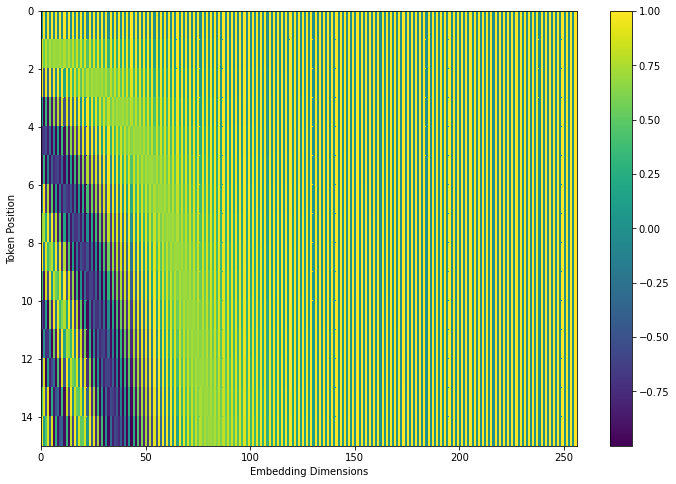

In [33]:
tokens = 15
dimensions = 256

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()